# Aaron Kohn
## Final Project; Mileston 4
### Universal Studio Ratings Sentiment Analysis

These steps are the begining of trying to see if there is a way to categorize the reviews. Knowing what people like or dislike can help focus attention in those areas.

In [1]:
import pandas as pd
import yellowbrick
import numpy as np
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk import pos_tag
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
# Load data as in milestone 3
universal_df = pd.read_csv('universal_studio_branches.csv')
# Remove duplicates
print(sum(universal_df.duplicated(subset = ['review_text'])))
print(sum(universal_df.duplicated(subset = ['review_text', 'rating'])))
universal_df.drop_duplicates(subset = ['review_text', 'rating'], inplace=True)
print(sum(universal_df.duplicated()))
universal_df.drop(['reviewer'], axis=1, inplace=True)
print("The dimension of the table is: ", universal_df.shape)

57
55
0
The dimension of the table is:  (50849, 5)


In [3]:
universal_df.head()

,rating,written_date,title,review_text,branch
0,2.0,"May 30, 2021",Universal is a complete Disaster - stick with ...,We went to Universal over Memorial Day weekend...,Universal Studios Florida
1,1.0,"May 30, 2021",Food is hard to get.,The food service is horrible. I’m not reviewin...,Universal Studios Florida
2,2.0,"May 30, 2021",Disappointed,I booked this vacation mainly to ride Hagrid m...,Universal Studios Florida
3,4.0,"May 29, 2021",My opinion,When a person tries the test seat for the ride...,Universal Studios Florida
4,5.0,"May 28, 2021",The Bourne Stuntacular...MUST SEE,"Ok, I can't stress enough to anyone and everyo...",Universal Studios Florida


In [4]:
def clean_text(text):
    # Clean text, remove end of lines, remove uppercase letters, puctuation and numbers.
    text = text.replace('\n','')
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    r=re.compile(r'\d')
    text = r.sub('', text)
    text = text.strip()
    return text
def stringit(x):
    # Convert list of words to string
    y = " "
    
    return y.join(x)
def normalize_text(df, col, add_on= ''):
    # Clean, Tokenize, and stem text. Remove stopwords from text. Returns a cleaned column, a tokenized column, and a column of tokens as string
    df['clean_txt' + add_on] = df[col].apply(lambda x : clean_text(x))
    df['tokenized_txt' + add_on] = df['clean_txt' + add_on].apply(lambda x : word_tokenize(x))
    stopword = stopwords.words('english') # Set stopwords
    df['tokenized_txt' + add_on] = df['tokenized_txt' + add_on].apply(lambda x : [word for word in x if word not in stopword]) # Remove stopwords for each row
    porter = nltk.stem.PorterStemmer() # Create stemmer
    df['stemmed_txt' + add_on] = df['tokenized_txt' +add_on].apply(lambda x : [porter.stem(word) for word in x])
    df['stemmed_string' + add_on] = df['stemmed_txt' + add_on].apply(lambda x : stringit(x))

In [5]:
normalize_text(universal_df, 'review_text', add_on= '_review')

In [6]:
universal_df['tagged_title'] = universal_df['title'].apply(lambda x : pos_tag(word_tokenize(x))) # Add part of speech tags to title
universal_df['tagged_review'] = universal_df['review_text'].apply(lambda x : pos_tag(word_tokenize(x))) # Add part of speech tags to review

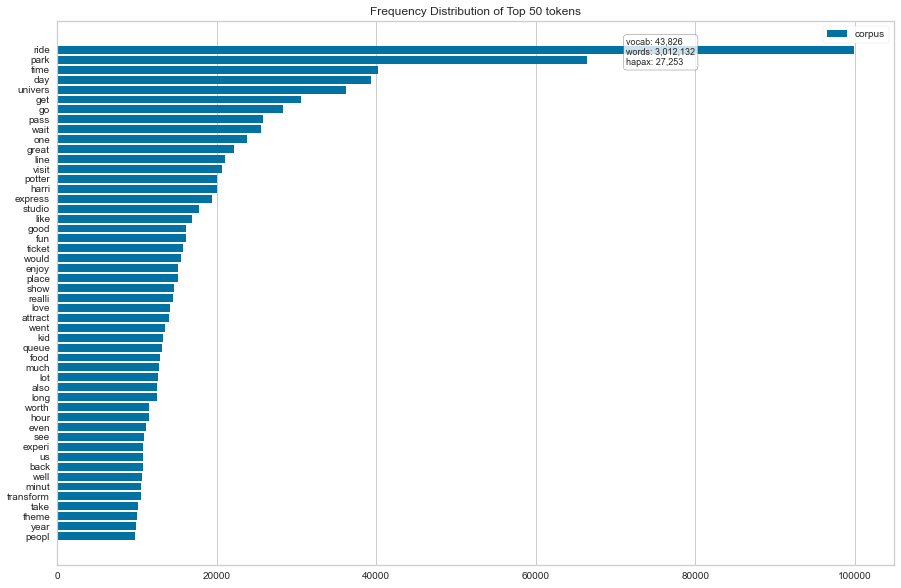

In [7]:
# Get word count and plot top 50 words for full dataset
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(universal_df['stemmed_string_review'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, size=(1080, 720))
visualizer.fit(docs)
visualizer.poof();

In [9]:
universal_df_neg=universal_df[universal_df['rating']<3]
universal_df_pos = universal_df[universal_df['rating']>=3]

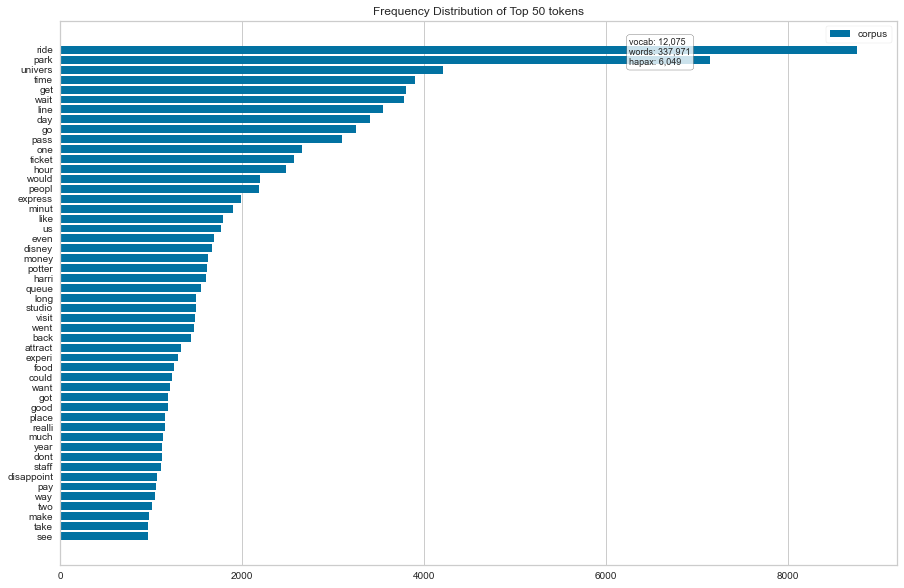

In [10]:
# Get word count and plot top 50 words for dataset with ratings under 3
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(universal_df_neg['stemmed_string_review'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, size=(1080, 720))
visualizer.fit(docs)
visualizer.poof();

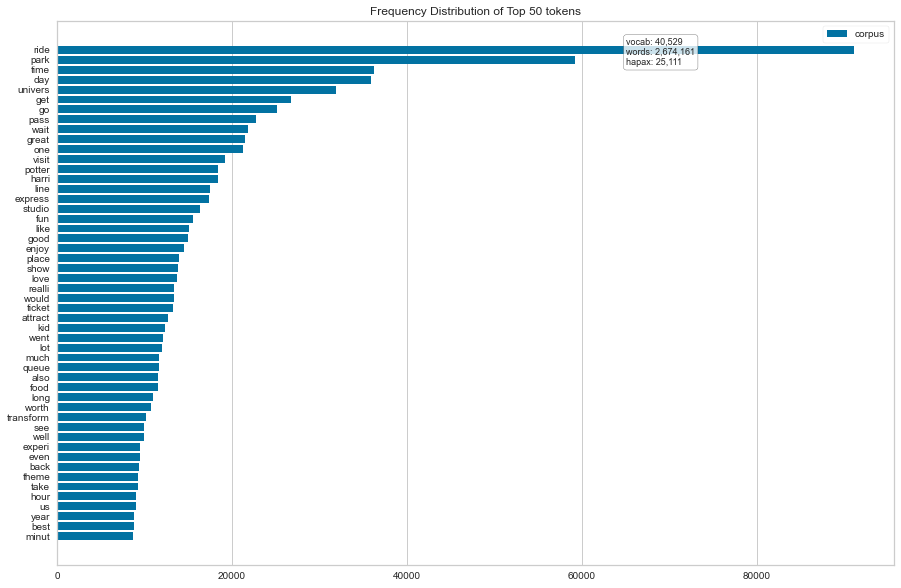

In [11]:
# Get word count and plot top 50 words for dataset with ratings 3 and over
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(universal_df_pos['stemmed_string_review'])
features = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, size=(1080, 720))
visualizer.fit(docs)
visualizer.poof();